<center><h1>
تمرین عملی دوم
</h1></center>

<div dir="rtl">
در این تمرین می‌خواهیم یک بازی ساده و تاثیر تکرار بازی را با هم بررسی کنیم. در هر مرحله کافی‌ست توابع معرفی‌شده را پیاده‌سازی کنید.

لطفا برای اطمینان از محل اجرا، قطعه‌کد پایین را اجرا کنید.
</div>

In [10]:
%%bash
if [ ! -d game_environment ]; then
    echo "Please run from the directory where game_environment directory is placed."
    exit -1
fi

pip install matplotlib
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<div dir="rtl">
<h2>یک تصمیم ساده (۵ نمره)</h2>
در این بازی می‌خواهیم مبلغی را بین دو نفر پخش کنیم. در صورتی که دو نفر به توافق برسند، مبلغ مطابق توافق آن‌ها بین‌شان پخش می‌گردد، در غیر این‌صورت به هیچ‌یک از آن‌ها مبلغی تعلق نمی‌گیرد.

برای پیاده‌سازی بازی لازم است توابع `generate_offer` و `receive_offer` را در قطعه‌کد زیر پیاده‌سازی کنید.

تابع `generate_offer` در ورودی خود مقداری که باید پخش شود را ورودی گرفته و در خروجی یک دوتایی برمی‌گرداند که مقدار اول سهم خودش از توافق را مشخص می‌کند و مقدار دوم سهم نفر دیگر را. بدیهی‌ست که باید مجموع این دو مقدار برابر با کل مقدار دریافتی باشد.

تابع `receive_offer` یک دوتایی دریافت می‌کند که مقدار اول سهم نفر دیگر از توافق و مقدار دوم سهم بازیکن را از توافق مشخص می‌کند. تضمین می‌شود که مجموع این دو مقدار برابر کل مقداری‌ست که باید پخش شود. در خروجی این تابع در صورت تایید توافق مقدار `True` و در غیر این‌صورت باید مقدار `False` برگردانده شود.

In [11]:
from typing import Tuple
from game_environment import Strategy

class MySimpleStrategy(Strategy):
    def generate_offer(self, value: int, **kwargs):
        # TODO: Your code here.
        first_val = value/2
        second_val = value - first_val

        return (first_val, second_val)

    def receive_offer(self, offer: Tuple[int, int], **kwargs):
        # TODO: Your code here.
        
        return offer[1] >= offer[0]


<div dir="rtl"> <font color="green">
استراتژی ما این است که در هر دور به صورت کاملا منصفانه پیشنهاد دهیم و در نهایت اگر پیشنهاد منصفانه ( یا بهتر ) به ما شد، آنرا قبول کنیم.
</font></div>

<div dir="rtl">
حال یک جامعه‌ی ۲۰ نفره در نظر می‌گیریم و همچنین علاوه بر استراتژی مشخص‌شده توسط شما، از چند استراتژی دیگر هم استفاده می‌کنیم. نحوه‌ی عملکرد این استراتژی‌ها را در قطعه‌کد زیر می‌توانید مشاهده کنید.

در ده‌هزار مرحله، در هر مرحله دو فرد تصادفی از جامعه انتخاب می‌کنیم و بین آن دو یک بازی برگزار می‌کنیم. نتایج را با تهیه‌ی پلات می‌توانید مشاهده کنید.
</div>

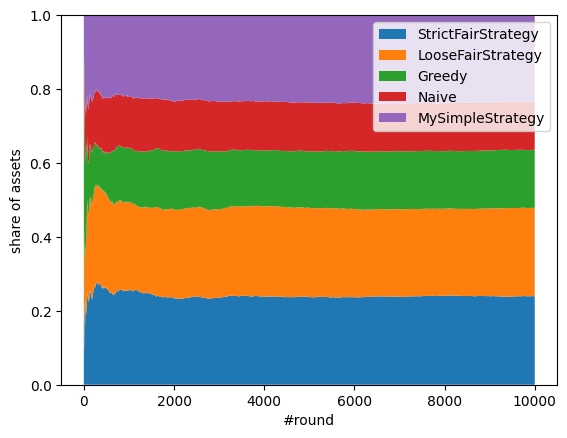

Final share of assets:
* StrictFairStrategy:		24%
* LooseFairStrategy:		24%
* Greedy:		16%
* Naive:		13%
* MySimpleStrategy:		24%


In [28]:
from game_environment import GameConfiguration, GameRunner, Strategy


class StrictFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0]


class LooseFairStrategy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 2, value / 2]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


class Greedy(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value * 99 / 100, value / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] >= offer[0] * 90


class Naive(Strategy):
    def generate_offer(self, value, **kwargs):
        return [value / 100, value * 99 / 100]

    def receive_offer(self, offer, **kwargs):
        return offer[1] > 0


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MySimpleStrategy() for i in range(4)],
    games=10000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
در این استراتژی‌ها به این علت که صرفا یک دور بازی صورت می‌گیرد، منصفانه بازی کردن با تقریب خوبی بهترین استراتژی است که در اعداد جواب نیز مشاهده می‌شود. همچنین به این علت که بازیکنان پیشنهادهای حریصانه را رد می‌کنند، این پیشنهاد همواره به رد کردن می‌انجامد پس احتمالا به فرد حریص چیزی نمی‌رسد.
</font></div>

<div dir="rtl">
<h2>یک تصمیم سخت (۲۰ + ۱۰ نمره)</h2>
در این قسمت می‌خواهیم تاثیر اعتبار بر این بازی را بررسی کنیم. برای این کار، در هنگام ارائه‌ی پیشنهاد و دریافت آن علاوه بر موارد قبلی که دریافت می‌کردید، لیستی از مذاکراتی که قبلا انجام شده هم دریافت می‌کنید.

به عنوان مثال یک استراتژی نمونه در اختیارتان قرار گرفته است. در این استراتژی، در صورتی که دارایی شخص بیشتر از طرف مقابل باشد، کل مبلغ (و یا آن‌چه او پیشنهاد داده) را به او می‌بخشد و در غیر این صورت، در غیر این‌صورت به او پیشنهاد یک درصد مبلغ را می‌دهد و یا تنها در صورتی پیشنهاد او را قبول می‌کند که اکیدا به نفع او باشد.

شما هم استراتژی‌های زیر را پیاده‌سازی کنید:

تعریف: یک فرد را طمع‌کار می‌نامیم اگر در بیش از نیمی از مذاکرات موفقش، بیش از نیمی از مبلغ را برداشته باشد.

1. به هر شخصی پیشنهاد عادلانه‌ی نصف مبلغ را بدهد و به افراد طمع‌کار پیشنهاد یک درصد مبلغ را بدهد تا تنبیه شوند. همچنین هر پیشنهادی را قبول کند مگر این که شخص طمع‌کاری پیشنهادی کمتر از نصف مبلغ داده‌باشد. این استراتژی را `AntiGreedy` می‌نامیم.
1. هنگام دریافت پیشنهاد هر پیشنهاد بزرگ‌تر از صفری را قبول می‌کند و هنگام ارائه‌ی پیشنهاد در صورتی که حداقل نیمی از مذاکرات طرف مقابل با افراد طمع‌کار به توافقی با حداقل نصف مبلغ به سود فرد طمع‌کار تمام‌شده باشد، پیشنهاد یک درصد مبلغ را می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `GeniusGreedy` می‌نامیم.
1. در هنگام دریافت پیشنهاد، در صورتی که بزرگتر از صفر باشد آن را قبول می‌کند و در هنگام ارائه‌ی پیشنهاد در صورتی که در آخرین بازی‌ای که طرف مقابل پیشنهاد ارائه داده، برای خودش مبلغ کمترمساوی نصف مبلغ را قرار داده باشد، به او کل مبلغ را پیشنهاد می‌دهد و در غیر این‌صورت نیمی از مبلغ را پیشنهاد می‌دهد. این استراتژی را `FairSupporter` می‌نامیم.
1. یک استراتژی مدنظر شما.

پس از پیاده‌سازی این سناریوها مطابق قسمت قبل، جامعه‌ای ۲۰ نفره با این افراد درست کنید و نشان دهید چگونه تغییر نسبت افراد به نتایج مختلفی در توزیع نهایی دارایی منجر می‌شود.


در نهایت استراتژی آخر هر یک از دانشجویان در یک جامعه قرار می‌گیرند و ۱۰ نمره از این قسمت مطابق عملکرد استراتژی در آن جامعه منظور می‌گردد.
</div>

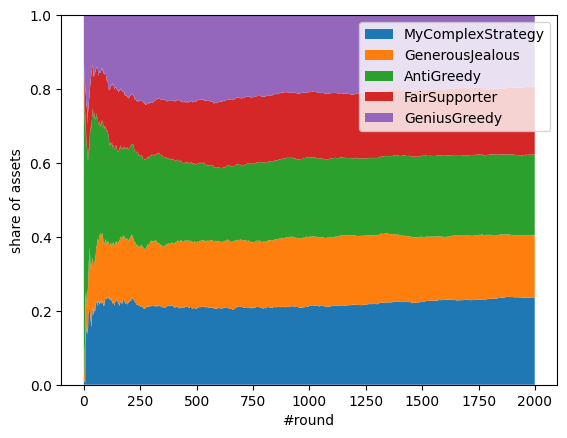

Final share of assets: (equal players)
* MyComplexStrategy:		24%
* GenerousJealous:		17%
* AntiGreedy:		22%
* FairSupporter:		18%
* GeniusGreedy:		19%


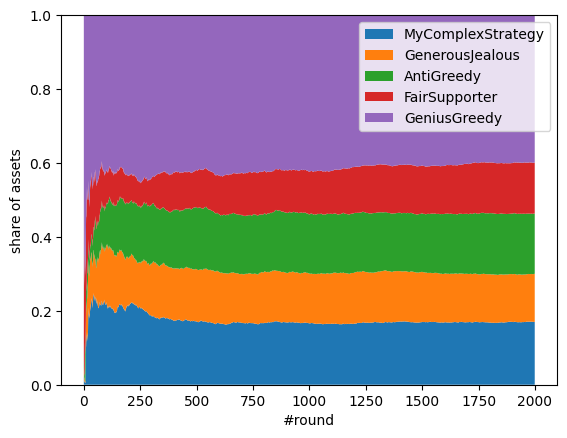

Final share of assets:(mostly greedy)
* MyComplexStrategy:		17%
* GenerousJealous:		13%
* AntiGreedy:		16%
* FairSupporter:		14%
* GeniusGreedy:		40%


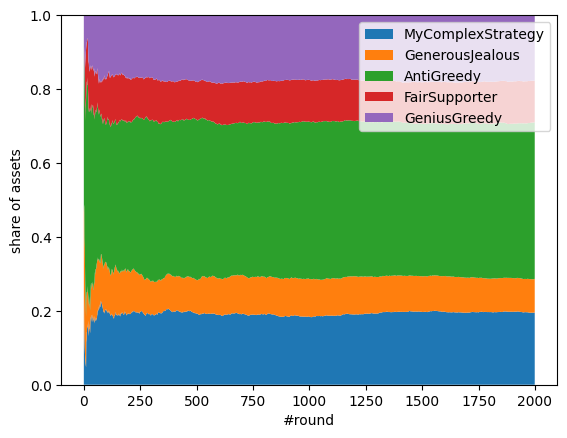

Final share of assets:(mostly anti-greedy)
* MyComplexStrategy:		20%
* GenerousJealous:		9%
* AntiGreedy:		42%
* FairSupporter:		11%
* GeniusGreedy:		18%


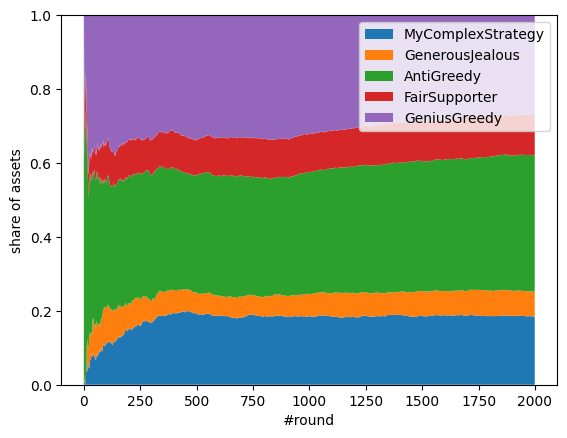

Final share of assets:(alot of greedy and anti greedy)
* MyComplexStrategy:		18%
* GenerousJealous:		7%
* AntiGreedy:		37%
* FairSupporter:		11%
* GeniusGreedy:		27%


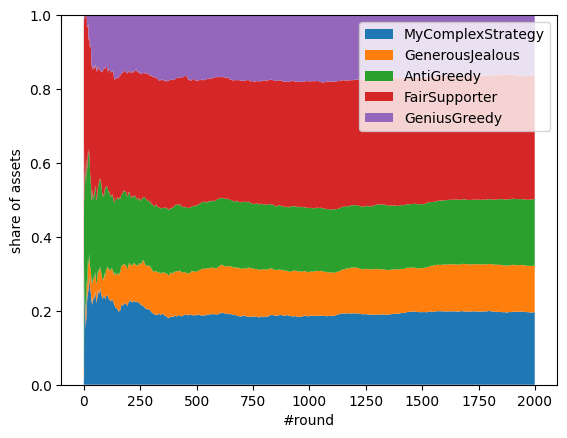

Final share of assets:(mostly supporters)
* MyComplexStrategy:		20%
* GenerousJealous:		13%
* AntiGreedy:		18%
* FairSupporter:		33%
* GeniusGreedy:		16%


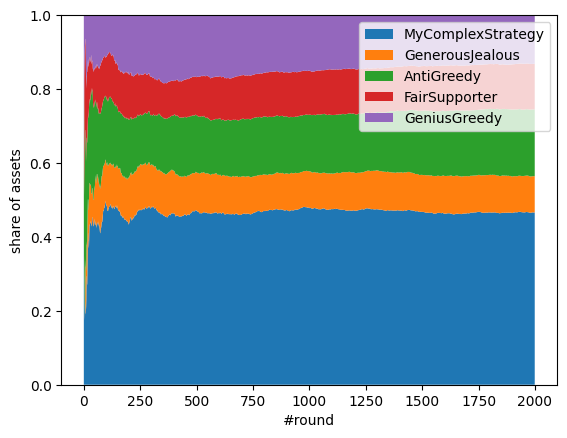

Final share of assets:(mostly fair players)
* MyComplexStrategy:		47%
* GenerousJealous:		10%
* AntiGreedy:		18%
* FairSupporter:		12%
* GeniusGreedy:		13%


In [39]:
from game_environment import GameConfiguration, GameRunner, Strategy
from typing import Any, Dict, List, Tuple

def is_greedy(
        player_indx : int,
        previous_games: List[Dict[str, Any]],
):
        prev_greeds = 0 
        for game in previous_games : 
            if game["initial giver"] == player_indx  :
                # print("choopm",game)
                if game["accepted"] :
                        if game["offers"][0][0] > game["offers"][0][1]: 
                            prev_greeds += 1
                        else : 
                            prev_greeds -= 1 
        return prev_greeds > 0


class MyComplexStrategy(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        # TODO: Your code here.
        got = 0
        gave = 0
        for game in previous_games :
            if game["initial giver"] == your_idx: 
                if game["offers"][-1][0] > game["offers"][-1][1]:
                    got += 1
                else :
                    gave += 1
        if gave > got :
            return (99 * value/100, value/100)
        return (value/2, value/2)

    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        # TODO: Your code here.
        return offer[1] >= offer[0]
    
class AntiGreedy(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        # TODO: Your code here.
        if is_greedy(receiver_idx,previous_games=previous_games):
            return (value * 99/100, value/100)
        else :
            return (value/2,value/2)
        
    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        # TODO: Your code here.
        return offer[1] > 0 and not (is_greedy(giver_idx,previous_games=previous_games) and offer[0] > offer[1])
    
class GeniusGreedy(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        # TODO: Your code here.
        opp_gready = False
        prev_greeds = 0 
        all_rec_greeds = 0
        for game in previous_games : 
            # print("chipoo")
            if game["initial receiver"] == receiver_idx and is_greedy(game["initial giver"],previous_games=previous_games):
                # print(game)
                if game["accepted"] :
                    # print(game)
                    all_rec_greeds += 1
                    if game["offers"][0][0] >= game["offers"][0][1]: 
                        prev_greeds += 1
            else :
                pass
        
        if all_rec_greeds > 0 and (prev_greeds/all_rec_greeds) >= 0.5 :
            return (99 * value /100, value/100)
        else :
            return (value/2,value/2)

    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        # TODO: Your code here.
        return offer[1] > 0


class FairSupporter(Strategy):
    """
    Each game is represented by a dictionary:
    {
        "initial giver": player_idx (int),
        "initial receiver": player_idx (int),
        "offers": List of offers where each entry is a tuple
                    where the first entry represents initial giver's
                    share and second entry represents initial
                    receiver's share. Here the list has only one offer
                    as the decision has to be made then. (List[Tuple[int, int]])
        "accepted": If the last offer was accepted. (bool)
    }
    """

    def generate_offer(
        self,
        value: int,
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        receiver_idx: int,
    ):
        # TODO: Your code here.
        fair = False 
        for game in reversed(previous_games):
            # print("choopi")
            if game["initial giver"] == receiver_idx :
                # print(game["offers"])
                if game["offers"][0][0] <= game["offers"][0][1]:
                    fair = True
                break
        
        if fair : 
            return (0,value)
        else :
            return (value/2,value/2)


    def receive_offer(
        self,
        offer: Tuple[int, int],
        previous_games: List[Dict[str, Any]],
        your_idx: int,
        giver_idx: int,
    ):
        # TODO: Your code here.
        return offer[1] > 0


class GenerousJealous(Strategy):
    def get_assets(self, previous_games):
        assets = {}
        for game in previous_games:
            if game["initial giver"] not in assets:
                assets[game["initial giver"]] = 0
            if game["initial receiver"] not in assets:
                assets[game["initial receiver"]] = 0
            if game["accepted"]:
                assets[game["initial giver"]] += game["offers"][-1][0]
                assets[game["initial receiver"]] += game["offers"][-1][1]
        return assets

    def generate_offer(self, value, previous_games, your_idx, receiver_idx):
        assets = {your_idx: 0, receiver_idx: 0}
        assets.update(self.get_assets(previous_games))
        if assets[your_idx] < assets[receiver_idx]:
            return [value * 99 / 100, value / 100]
        else:
            return [value / 100, value * 99 / 100]

    def receive_offer(self, offer, previous_games, giver_idx, your_idx):
        assets = {your_idx: 0, giver_idx: 0}
        assets.update(self.get_assets(previous_games))
        if assets[your_idx] < assets[giver_idx]:
            return offer[1] > offer[0]
        return True


game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(4)]
    + [GenerousJealous() for i in range(4)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(4)]  
    + [FairSupporter() for i in range(4)]  
    + [GeniusGreedy() for i in range(4)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets: (equal players)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))




game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(3)]
    + [GenerousJealous() for i in range(3)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(3)]  
    + [FairSupporter() for i in range(3)]  
    + [GeniusGreedy() for i in range(8)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:(mostly greedy)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))



game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(3)]
    + [GenerousJealous() for i in range(3)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(8)]  
    + [FairSupporter() for i in range(3)]  
    + [GeniusGreedy() for i in range(3)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:(mostly anti-greedy)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))



game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(3)]
    + [GenerousJealous() for i in range(2)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(6)]  
    + [FairSupporter() for i in range(3)]  
    + [GeniusGreedy() for i in range(6)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:(alot of greedy and anti greedy)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(3)]
    + [GenerousJealous() for i in range(3)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(3)]  
    + [FairSupporter() for i in range(8)]  
    + [GeniusGreedy() for i in range(3)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:(mostly supporters)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


game_configuration = GameConfiguration(
    strategies=[MyComplexStrategy() for i in range(8)]
    + [GenerousJealous() for i in range(3)]  # TODO: + other strategies you added.
    + [AntiGreedy() for i in range(3)]  
    + [FairSupporter() for i in range(3)] 
    + [GeniusGreedy() for i in range(3)],
    games=2000,
)

games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:(mostly fair players)")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))





<div dir="rtl"> <font color="green">
همانطور که مشاهده می‌شود، در یک جامعه با افراد تقریبا یکسان، استراتژی ما که همان استراتژی نیمه منصفانه است برنده می‌شود چون طبق Nash بهترین گزینه را به افراد مختلف می‌دهد که اکثرا قبول می‌کنند. <br>
در صورت که جامعه پر از افراد حریص باشد، به احتمال زیاد، کل دارایی در مشت افراد حریص می‌افتد و در صورتی که جامعه پر از افراد ضد حریص باشد دارایی افراد حریص بسیار کم شده پس کسی میل به حریص بودن ندارد. در جامعه‌ای که افراد حریص و ضد حریص زیاد باشند احتمالا باید در یکی از این دو گروه را انتخاب کرد در غیر این صورت دچار باخت سنگین می‌شویم. در جامعه‌ای که همه افراد حامی یکدیگر باشند، حامی بودن نیز سود بالایی دارد و نهایتا در جامعه نیمه منصفانه بهترین کار نیمه منصف بودن است.
</font></div>

<div dir="rtl">
<h2>دو تصمیم ساده (۱۵ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، با این حال در صورتی که پیشنهاد طرف مقابل را نپذیرید، می‌توانید یک پیشنهاد متقابل به او ارائه دهید.

مثلا فرض کنید طرف مقابل به شما پیشنهاد می‌دهد که تمام مقدار را خودش بردارد. در صورتی که در `receive_offer` مقدار `True` برگردانید، توافق مطابق قسمت قبل انجام می‌شود، در غیر این‌صورت تابع `generate_offer` شما صدا زده می‌شود تا پیشنهادی متقابل ارائه کنید. شرایط این پیشنهاد مطابق یک پیشنهاد عادی‌ست.

برای این که بتوانید حالت کنونی خود را به خوبی دنبال کنید، در ابتدای هر دوره از مذاکرات، تابع `start_round` صدا زده می‌شود.

مشابه قسمت قبل چند استراتژی ساده‌ی دیگر وجود دارند که با آن‌ها رقابت می‌کنید.
</div>

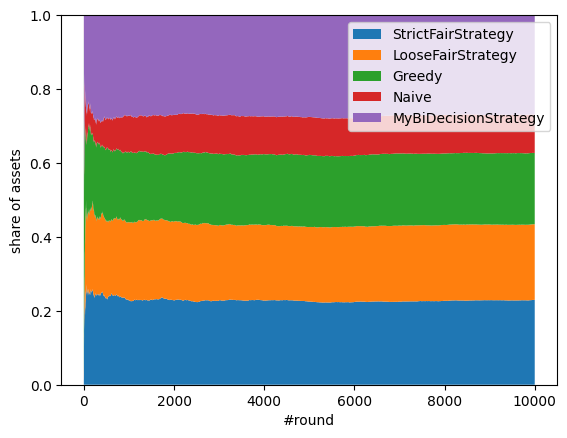

Final share of assets:
* StrictFairStrategy:		23%
* LooseFairStrategy:		20%
* Greedy:		19%
* Naive:		10%
* MyBiDecisionStrategy:		27%


In [33]:
from game_environment import GameConfiguration, GameRunner, Strategy


class MyBiDecisionStrategy(Strategy):
    def start_round(self):
        # [OPTIONAL] TODO: Your code here.
        ...
        self.previous_offers = []


    def generate_offer(self, value, **kwargs):
        # TODO: Your code here.
        # print(self.previous_offers)
        if len(self.previous_offers)%2 == 1 :
            return (value/2, value/2)
        else : 
            return (value * 99/100,value *1/100)

    def receive_offer(self, offer, **kwargs):
        # TODO: Your code here.
        if offer[1] >= offer[0] : 
            return True
        # if len(self.previous_offers) >= 1 : 
        #     return False
        self.previous_offers.append(offer)
        summ = offer[1] + offer[0]
        self.generate_offer(summ)


game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=2,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
در این استراتژی در اولین دور پیشنهاد ۱/۱۰۰ برای بازیکن مقابل و ۹۹/۱۰۰ برای خود بازیکن داده می‌شود و در صورتی که بازیکن دوم قبول نکرد در دور بعدی پیشنهاد نصف نصف داده می‌شود و در صورتی نیز پیشنهاد قبول می‌شود که نصف یا بیشتر به بازیکن ما تخصیص داده شود.<br>
این استراتژی بهترین گزینه است چرا که در صورتی که بازیکن مقابل پیشنهاد ۱/۱۰۰ را قبول کند،‌ همچی بر وفق مراد پیش می‌رود اما اگر نه در آفر دوم احتمالا نصف نصف را قبول کند.
</font></div>

<div dir="rtl">
<h2>چند تصمیم ساده (۲۰+۱۰ نمره)</h2>
در این قسمت مشابه قسمت قبل، اطلاعی از شخصیت و یا استراتژی طرف مقابل ندارید، و می‌توانید در صورتی که پیشنهاد طرف مقابل را نپذیرید، یک پیشنهاد متقابل به او ارائه دهید اما این روند پیشنهاد متقابل `k` بار ادامه پیدا می‌کند و در هر مرحله هر کس بعد از رد کردن پیشنهاد، یک پیشنهاد متقابل ارائه می‌کند. به عبارت دیگر قسمت قبل، حالت خاصی با `k=2` است.

مشابه قسمت قبل از استراتژی‌های دیگر در کنار استراتژی خود استفاده کنید و نتیجه را با `k=5` و `k=10` نمایش دهید. توجه کنید که `k` را با استفاده از متغیر `offers` می‌توانید در تنظیمات بازی مشخص کنید.

مشابه قبل، یک جامعه‌ی دیگر با دانشجوهای درس تشکیل می‌شود و با یک `k` ثابت، بازی‌ها انجام می‌شوند. لطفا استراتژی خود را برای این جامعه هم مشخص کنید. عملکرد شما در این بخش، ۱۰ نمره از این قسمت را در بر می‌گیرد.
</div>

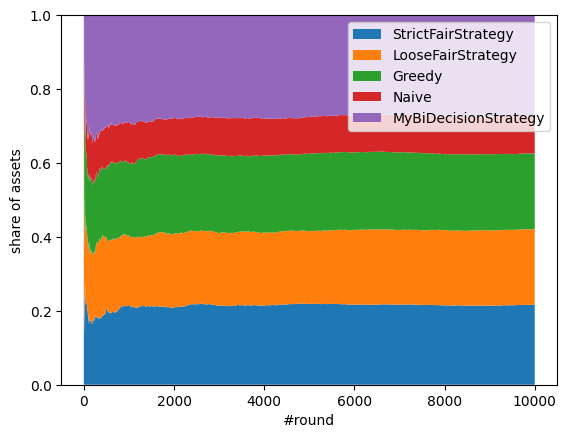

Final share of assets for 5 rounds:
* StrictFairStrategy:		22%
* LooseFairStrategy:		20%
* Greedy:		20%
* Naive:		10%
* MyBiDecisionStrategy:		27%


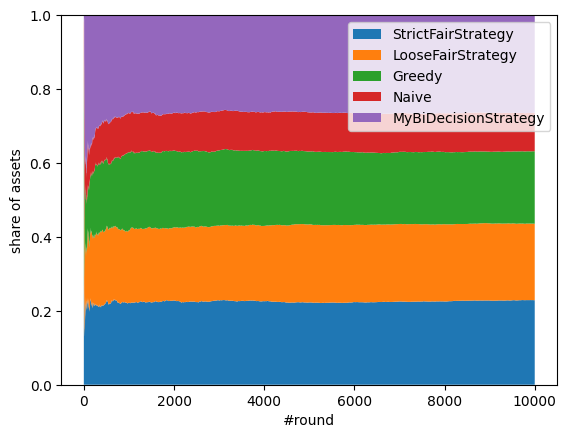

Final share of assets for 10 rounds:
* StrictFairStrategy:		23%
* LooseFairStrategy:		21%
* Greedy:		20%
* Naive:		10%
* MyBiDecisionStrategy:		26%


In [35]:
from game_environment import GameConfiguration, GameRunner, Strategy

game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=5,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets for 5 rounds:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))



game_configuration = GameConfiguration(
    strategies=[StrictFairStrategy() for i in range(4)]
    + [LooseFairStrategy() for i in range(4)]
    + [Greedy() for i in range(4)]
    + [Naive() for i in range(4)]
    + [MyBiDecisionStrategy() for i in range(4)],
    games=10000,
    offers=10,
    player2_offers=True,
)
games = GameRunner(game_configuration)
games.run()
games.plot()
print("Final share of assets for 10 rounds:")
assets = games.get_assets()
for key in assets:
    print("* {}:\t\t{}%".format(key, round(100 * assets[key] / sum(assets.values()))))


<div dir="rtl"> <font color="green">
استراتژی ما همانطور که از جواب‌ها پیداست بهینه عمل می‌کند چرا که احتمالا در هر حالتی در دورهای فرد،‌ پیشنهاد حریصانه داده می‌شود و در دورهای زوج پیشنهاد منصفانه که یعنی احتمالا در هر دو بازی در دو دور به اتمام می‌رسد. همچنین در ۱۰ بازی کمی بازی‌های منصفانه بهتر عمل می‌کنند که نشان می‌دهد احتمالا در تعداد بازی‌های بسیار زیاد استراتژی‌های حریصانه به باخت و استراتژی‌های غیر حریصانه به برد منجر می‌شوند.
</font></div>